<a href="https://colab.research.google.com/github/weiSENshu/NLP/blob/main/note_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.5 MB/s eta 0:00:00


ner(命名实体识别)

In [ ]:
import transformers
from transformers import pipeline

ner = pipeline("ner",grouped_entities = True) #grouped_entities为True则合并词组
ner("My name is dss and I work at Beijing University in Beijing.")

fill-mask(填充空缺)

In [ ]:
import transformers
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased")
result = unmasker("The man works as a [MASK].")
print([r["token_str"] for r in result])

result = unmasker("The woman works as a [MASK].")
print([r["token_str"] for r in result])

sentiment-analysis(情感分析)

In [ ]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")
classifier([
    "Nice to meet you.",
    "Today is sunday. "
])

zero-shot-classification(零样本分类)

In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification")
result = classifier(
    "My parents have earned $200 from this job",
    candidate_labels =["education","economy","business"]
    )
print(result)

text-generation(文本生成)

In [ ]:
from transformers import pipeline
generator = pipeline("text-generation")
generator("Today,I feel so sad that", 
          max_length = 50, #生成的最长单词数
          num_return_sequences = 3 #生成句子的个数
)

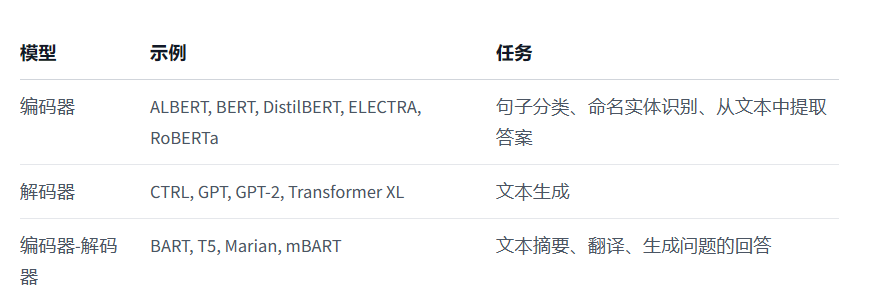

In [ ]:
from transformers import AutoTokenizer
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}
